In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

pd.options.display.max_columns= None

import warnings
warnings.filterwarnings("ignore")
import os

## Let's read the data.

In [3]:
df_train = pd.read_csv('Train_Set_TVS.csv')
df_test = pd.read_csv('Test_Set_TVS.csv')

In [4]:
df_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [5]:
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


## Understanding the Dataset

In [6]:
df_train['Default'].value_counts(normalize=True)

0.0    0.735699
1.0    0.264301
Name: Default, dtype: float64

In [7]:
rows, columns = df_train.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 132440
Columns: 33


In [8]:
rows, columns = df_test.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 56760
Columns: 32


In [9]:
df_train.info() #let's check the data types and other information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,132440.0,488938.279319,58568.207772,387652.0000,438095.5000,488952.5000,539702.0000,5.904070e+05
Compensation,126198.0,745051.897431,470276.230114,152728.0000,517706.0000,665996.0000,879489.0000,7.037702e+07
Loan_amt,132440.0,414801.133722,274678.779207,34275.0000,204529.9500,349542.5000,558205.0000,2.872142e+06
Annuity_amt,127829.0,10845.286442,2061.529355,5852.1000,9348.3700,10773.8200,12165.3900,4.130100e+04
density_Ind,127024.0,0.020446,0.015077,0.0001,0.0104,0.0204,0.0304,2.017800e+00
Home_Appliances,121476.0,3.220891,1.241751,1.0000,2.0000,4.0000,4.0000,1.900000e+01
Experience,110595.0,6.580616,6.357054,0.0000,2.1000,4.6000,9.0000,4.810000e+01
Dependents,132440.0,2.155467,0.909046,1.0000,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,120709.0,2.030553,0.503750,1.0000,2.0000,2.0000,2.0000,3.000000e+00
Age,132440.0,43.933260,11.962700,21.0000,34.0000,43.0000,54.0000,6.900000e+01


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [12]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,56760.0,489156.967089,58459.598434,387653.00,438878.0000,488939.5000,539700.5000,5.904010e+05
Compensation,54010.0,742311.044677,376480.936665,148330.00,516205.5000,666744.0000,877030.0000,1.727617e+07
Loan_amt,56760.0,414563.148217,275984.861035,34777.50,203558.7000,348862.8500,559860.7500,2.743640e+06
Annuity_amt,54797.0,10832.334840,2060.269444,6061.61,9344.3600,10756.4500,12142.3400,3.811600e+04
density_Ind,54485.0,0.020465,0.016790,0.00,0.0104,0.0203,0.0305,2.037200e+00
Home_Appliances,52001.0,3.220688,1.240932,1.00,2.0000,4.0000,4.0000,1.900000e+01
Experience,47409.0,6.590278,6.284459,0.00,2.2000,4.6000,9.0000,4.810000e+01
Dependents,56760.0,2.150828,0.909028,1.00,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,51707.0,2.028487,0.505052,1.00,2.0000,2.0000,2.0000,3.000000e+00
Age,56760.0,43.944327,11.979557,21.00,34.0000,43.0000,54.0000,6.900000e+01


## Checking for missing values

In [13]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

- ### missing value in 14 features.

In [14]:
nulval = df_train.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
ID,0,0.00
Compensation,6242,4.75
Vehicle_Status,9104,6.92
Loan_amt,0,0.00
Annuity_amt,4611,3.51
density_Ind,5416,4.12
Job_Type,10248,7.79
Default_hist,0,0.00
Prop_List,1965,1.49
Home_Appliances,10964,8.34


In [15]:
df_test.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [16]:
nulval = df_test.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
ID,0,0.00
Compensation,2750,4.89
Vehicle_Status,3883,6.90
Loan_amt,0,0.00
Annuity_amt,1963,3.49
density_Ind,2275,4.04
Job_Type,4320,7.68
Default_hist,0,0.00
Prop_List,911,1.62
Home_Appliances,4759,8.46


In [17]:
#  Checking duplicated value in train set
df_train.duplicated().sum()

0

In [18]:
#  Checking duplicated value in train set
df_test.duplicated().sum()

0

In [19]:
#Convering the descreate variable into catagorical


df_train['Home_Appliances']= df_train['Home_Appliances'].astype('object')
df_train['Dependents']= df_train['Dependents'].astype('object')
df_train['Company_Rating']= df_train['Company_Rating'].astype('object')
df_train['Product_bought']= df_train['Product_bought'].astype('object')


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  object 
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [21]:
#Convering the descreate variable into catagorical


df_test['Home_Appliances']= df_test['Home_Appliances'].astype('object')
df_test['Dependents']= df_test['Dependents'].astype('object')
df_test['Company_Rating']= df_test['Company_Rating'].astype('object')
df_test['Product_bought']= df_test['Product_bought'].astype('object')


In [22]:
df_train.head(10)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.00,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.00,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.00,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.00,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.00,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0
5,470028,1307402.0,Y,741690.00,10477.13,0.0236,Non-IT,ndf,One,4.0,Metro,2,Grad,Married,F,1_to_3,19.6,Not_Specified,mon,Yes,CLoan,2.0,NaN,North,43.0,14.0,Yes,Yes,0.703,0.703,1202.0,7.0,0.0
6,525234,757887.0,N,977270.00,10708.27,0.0089,IT,df,None,2.0,Metro,1,Grad,Married,F,1_to_3,4.1,Not_Specified,Tue,No,CLoan,4.0,2.0,South,36.0,12.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0
7,444411,866346.0,Y,187339.95,10269.91,0.0062,Non-IT,ndf,Morethan_One,1.0,Metro,1,Grad,Married,F,1_to_3,13.6,Not_Specified,Tue,No,CLoan,3.0,3.0,North,50.0,9.0,Yes,Yes,0.669,0.669,NaN,2.0,0.0
8,466413,836238.0,NaN,318034.00,12528.06,0.0368,IT,ndf,One,4.0,Metro,1,Grad,Married,F,1_to_3,7.6,Y,mon,Yes,CLoan,2.0,2.0,South,52.0,12.0,Yes,Yes,0.910,0.910,12.0,4.0,0.0
9,497049,822222.0,N,265048.00,8849.20,0.0138,Non-IT,ndf,One,4.0,Metro,1,Grad,Single,M,4_to_6,1.3,Not_Specified,thur,Yes,CLoan,1.0,2.0,East,34.0,12.0,Yes,Yes,0.757,NaN,888.0,6.0,1.0


In [23]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,132440.0,NaN,NaN,NaN,488938.279319,58568.207772,387652.0,438095.5,488952.5,539702.0,590407.0
Compensation,126198.0,NaN,NaN,NaN,745051.897431,470276.230114,152728.0,517706.0,665996.0,879489.0,70377021.0
Vehicle_Status,123336,2,N,81370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_amt,132440.0,NaN,NaN,NaN,414801.133722,274678.779207,34275.0,204529.95,349542.5,558205.0,2872142.0
Annuity_amt,127829.0,NaN,NaN,NaN,10845.286442,2061.529355,5852.1,9348.37,10773.82,12165.39,41301.0
density_Ind,127024.0,NaN,NaN,NaN,0.020446,0.015077,0.0001,0.0104,0.0204,0.0304,2.0178
Job_Type,122192,3,IT,66982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Default_hist,132440,2,ndf,119170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prop_List,130475,3,One,91559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_Appliances,121476.0,13.0,4.0,85306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,56760.0,NaN,NaN,NaN,489156.967089,58459.598434,387653.0,438878.0,488939.5,539700.5,590401.0
Compensation,54010.0,NaN,NaN,NaN,742311.044677,376480.936665,148330.0,516205.5,666744.0,877030.0,17276168.0
Vehicle_Status,52877,2,N,34721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_amt,56760.0,NaN,NaN,NaN,414563.148217,275984.861035,34777.5,203558.7,348862.85,559860.75,2743640.0
Annuity_amt,54797.0,NaN,NaN,NaN,10832.33484,2060.269444,6061.61,9344.36,10756.45,12142.34,38116.0
density_Ind,54485.0,NaN,NaN,NaN,0.020465,0.01679,0.0,0.0104,0.0203,0.0305,2.0372
Job_Type,52440,3,IT,28792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Default_hist,56760,2,ndf,51070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prop_List,55849,3,One,39222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_Appliances,52001.0,10.0,4.0,36490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's visulize the caterogical and Numerical values

In [25]:
cat = []

num = []

for i in df_train.columns:
    if df_train[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)


print('Categories: ',cat)
print('\n')
print('Numerical: ',num)

Categories:  ['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Addr_permanent', 'Permanent_Addr_tag', 'Product_bought']


Numerical:  ['ID', 'Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind', 'Experience', 'Age', 'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Default']


In [26]:
cat = []

num = []

for i in df_test.columns:
    if df_test[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)


print('Categories: ',cat)
print('\n')
print('Numerical: ',num)

Categories:  ['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Addr_permanent', 'Permanent_Addr_tag', 'Product_bought']


Numerical:  ['ID', 'Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind', 'Experience', 'Age', 'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age']


In [27]:
#   For catagorical  variable
df_cat=df_train.select_dtypes(include = ['object'])


In [28]:
#  Checking unique values for catagorical columns 
for column in df_cat.columns:
    print(column)
    print(df_cat[column].nunique())
    print(df_cat[column].value_counts().sort_values(ascending=False))
    
    print('\n')

Vehicle_Status
2
N    81370
Y    41966
Name: Vehicle_Status, dtype: int64


Job_Type
3
IT        66982
Non-IT    29488
Govt.     25722
Name: Job_Type, dtype: int64


Default_hist
2
ndf    119170
df      13270
Name: Default_hist, dtype: int64


Prop_List
3
One             91559
Morethan_One    25896
None            13020
Name: Prop_List, dtype: int64


Home_Appliances
13
4.0     85306
1.0     24047
2.0     10582
3.0      1483
5.0        31
6.0        15
10.0        3
12.0        2
7.0         2
14.0        2
19.0        1
9.0         1
8.0         1
Name: Home_Appliances, dtype: int64


Region_Type
3
Metro    107548
Rural     22278
other      2614
Name: Region_Type, dtype: int64


Credit_Inq
4
1     67072
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64


Education_det
3
Grad      93858
P_Grad    32457
Other      6125
Name: Education_det, dtype: int64


Marital_Stat
4
Married    97609
Single     19664
Divorce     8391
Widow       6776
Name: Marital_Stat, dtype: int64



In [29]:
#   For catagorical  variable
df_cat1=df_test.select_dtypes(include = ['object'])


In [30]:
#  Checking unique values for catagorical columns 
for column in df_cat1.columns:
    print(column)
    print(df_cat1[column].nunique())
    print(df_cat1[column].value_counts().sort_values(ascending=False))
    
    print('\n')

Vehicle_Status
2
N    34721
Y    18156
Name: Vehicle_Status, dtype: int64


Job_Type
3
IT        28792
Non-IT    12640
Govt.     11008
Name: Job_Type, dtype: int64


Default_hist
2
ndf    51070
df      5690
Name: Default_hist, dtype: int64


Prop_List
3
One             39222
Morethan_One    11046
None             5581
Name: Prop_List, dtype: int64


Home_Appliances
10
4.0     36490
1.0     10277
2.0      4526
3.0       690
5.0        12
6.0         2
8.0         1
14.0        1
7.0         1
19.0        1
Name: Home_Appliances, dtype: int64


Region_Type
3
Metro    46048
Rural     9526
other     1186
Name: Region_Type, dtype: int64


Credit_Inq
4
1     28703
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64


Education_det
3
Grad      40408
P_Grad    13689
Other      2663
Name: Education_det, dtype: int64


Marital_Stat
4
Married    41725
Single      8335
Divorce     3727
Widow       2973
Name: Marital_Stat, dtype: int64


Gen
2
M    37259
F    19501
Name: Gen, dtype: 

In [31]:
#   For Numeric variable
df_num=df_train.select_dtypes(include = ['float64', 'int64'])

In [32]:
#   For Numeric variable
df_num1=df_test.select_dtypes(include = ['float64', 'int64'])

In [33]:
# Skewness and kurtosis check for train
table = pd.concat([df_num.skew(), df_num.kurtosis()], axis=1, join="inner")
table=table.rename(columns={0:'Skewness',1:'kurtosis'})
table

,Skewness,kurtosis
ID,0.001480,-1.203850
Compensation,50.103597,6484.843867
Loan_amt,1.375253,2.547082
Annuity_amt,0.672772,2.941135
density_Ind,54.454096,7192.740774
Experience,1.939705,4.700420
Age,0.118174,-1.045736
hour_Process,-0.021477,-0.177428
c1_rated,-0.024232,-1.522689
c2_rated,-0.024363,-1.523359


In [34]:
# Skewness and kurtosis check for train
table1 = pd.concat([df_num1.skew(), df_num1.kurtosis()], axis=1, join="inner")
table1=table1.rename(columns={0:'Skewness',1:'kurtosis'})
table1

,Skewness,kurtosis
ID,0.000389,-1.192401
Compensation,5.962078,132.141592
Loan_amt,1.406849,2.767663
Annuity_amt,0.728637,3.443644
density_Ind,62.904486,7526.276231
Experience,1.914144,4.588909
Age,0.118924,-1.051195
hour_Process,-0.010508,-0.182590
c1_rated,-0.016813,-1.521459
c2_rated,-0.021110,-1.523682


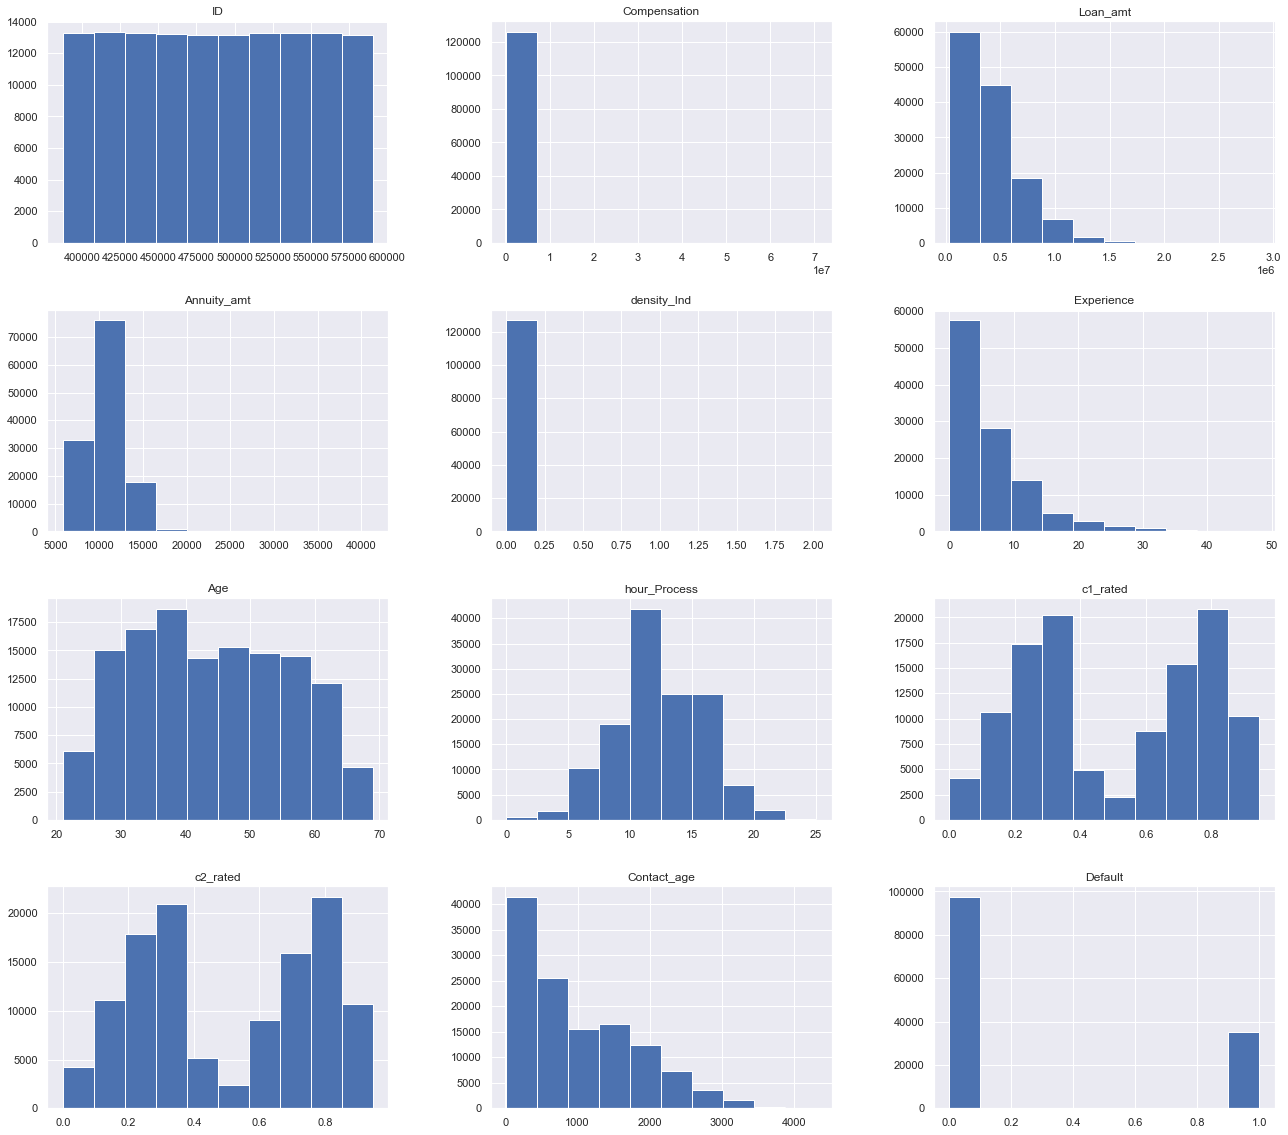

In [35]:
df_num.hist( figsize = (22, 20) )
plt.show()

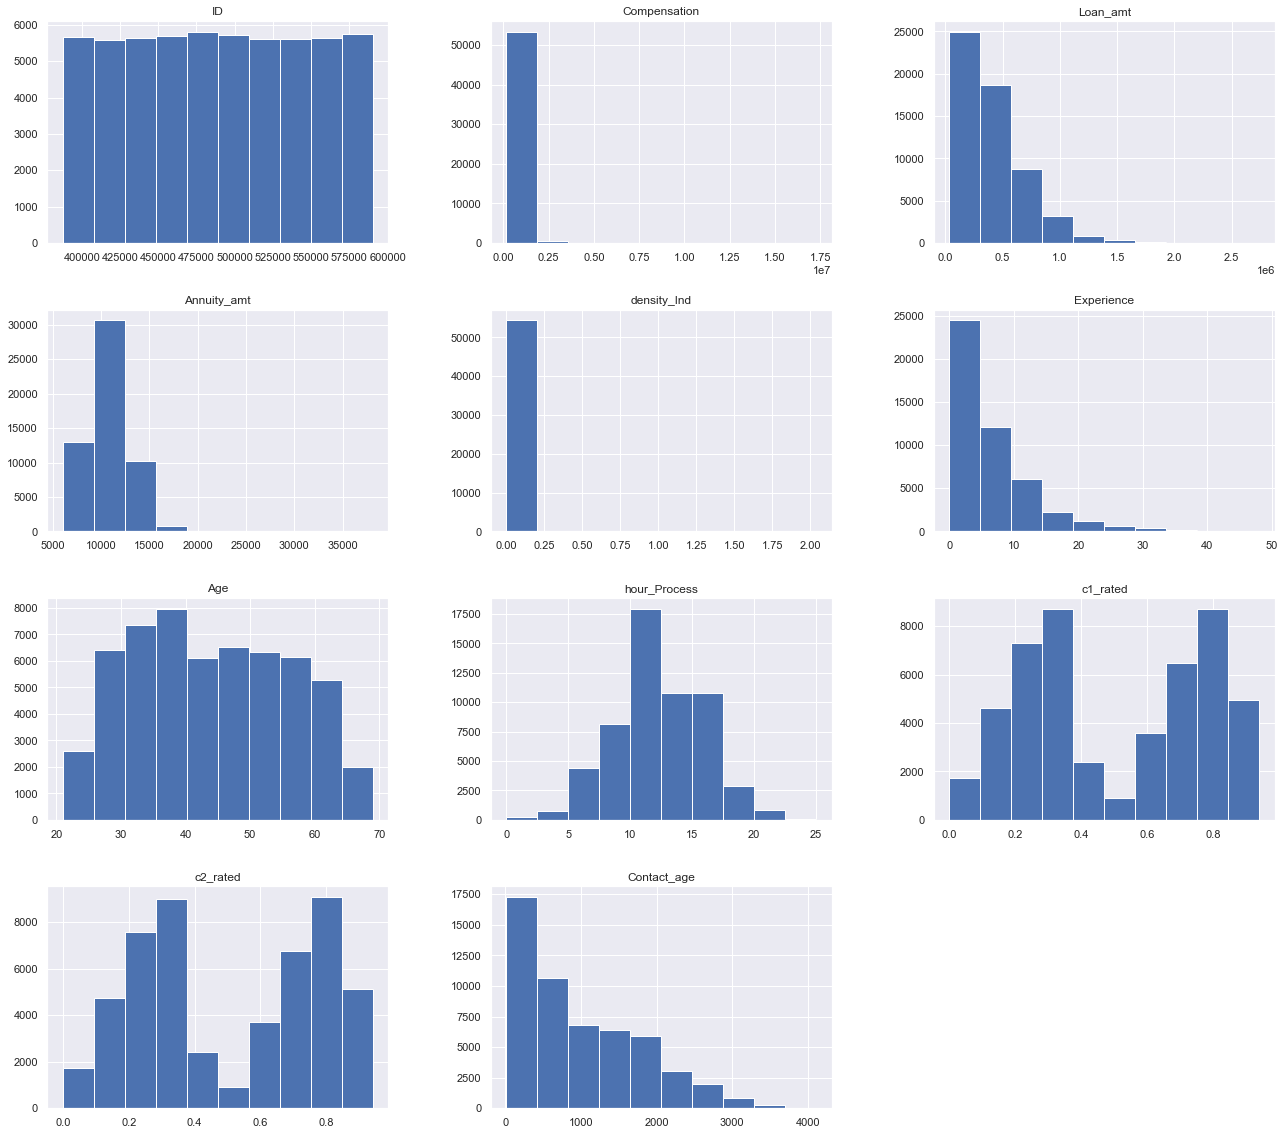

In [36]:
df_num1.hist( figsize = (22, 20) )
plt.show()

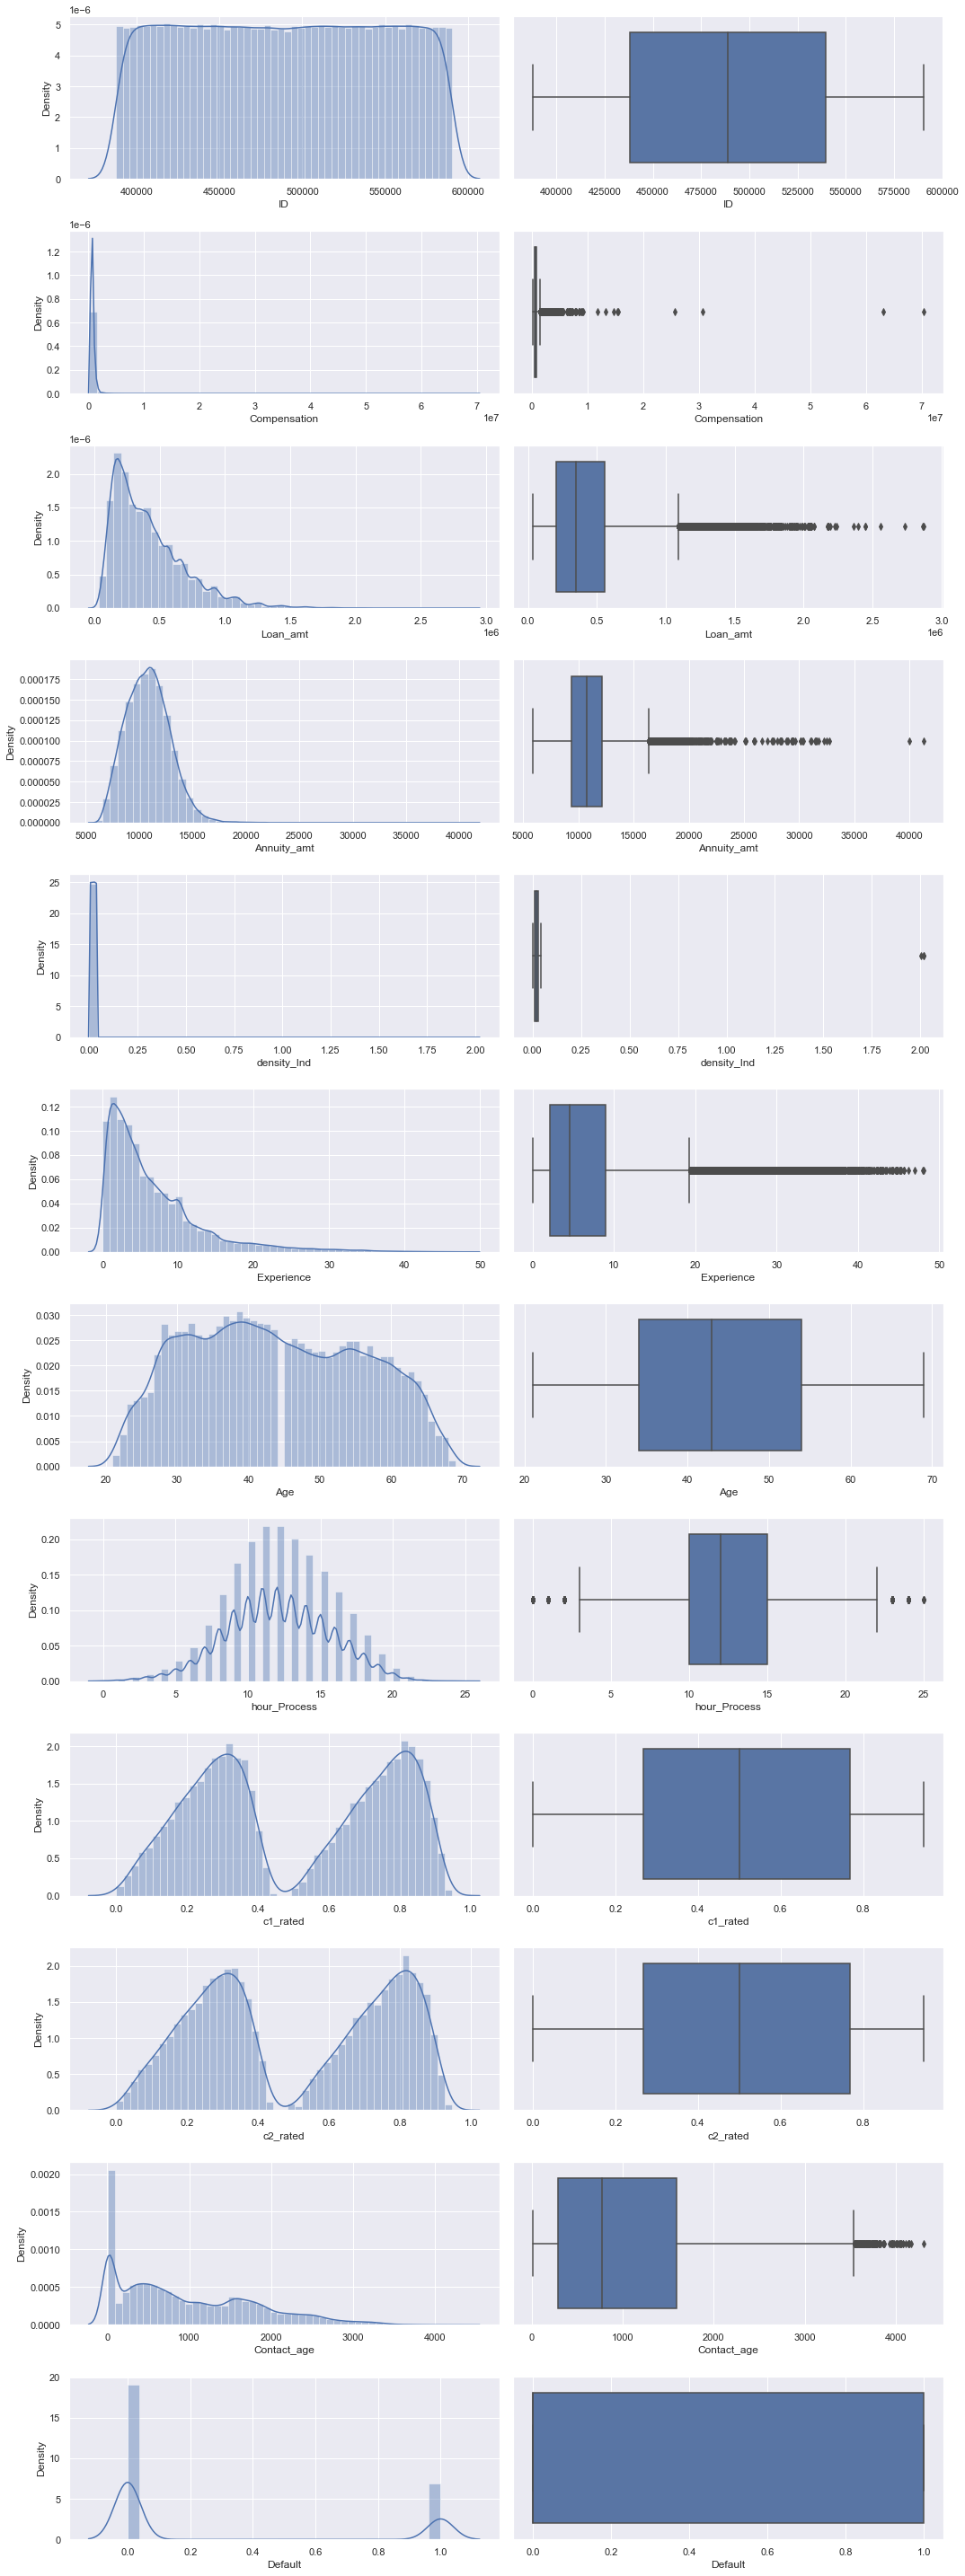

In [37]:

fig, axes = plt.subplots(nrows=12, ncols=2)
fig.set_size_inches(15,40)
j=0
for i in df_train.select_dtypes(include= 'number', exclude= 'object').columns:
    a = sns.distplot(df_train[i],ax=axes[j][0])
    a = sns.boxplot(df_train[i], orient = "h" , ax=axes[j][1])
    j=j+1
       
fig.tight_layout(w_pad=1.0)
plt.show()

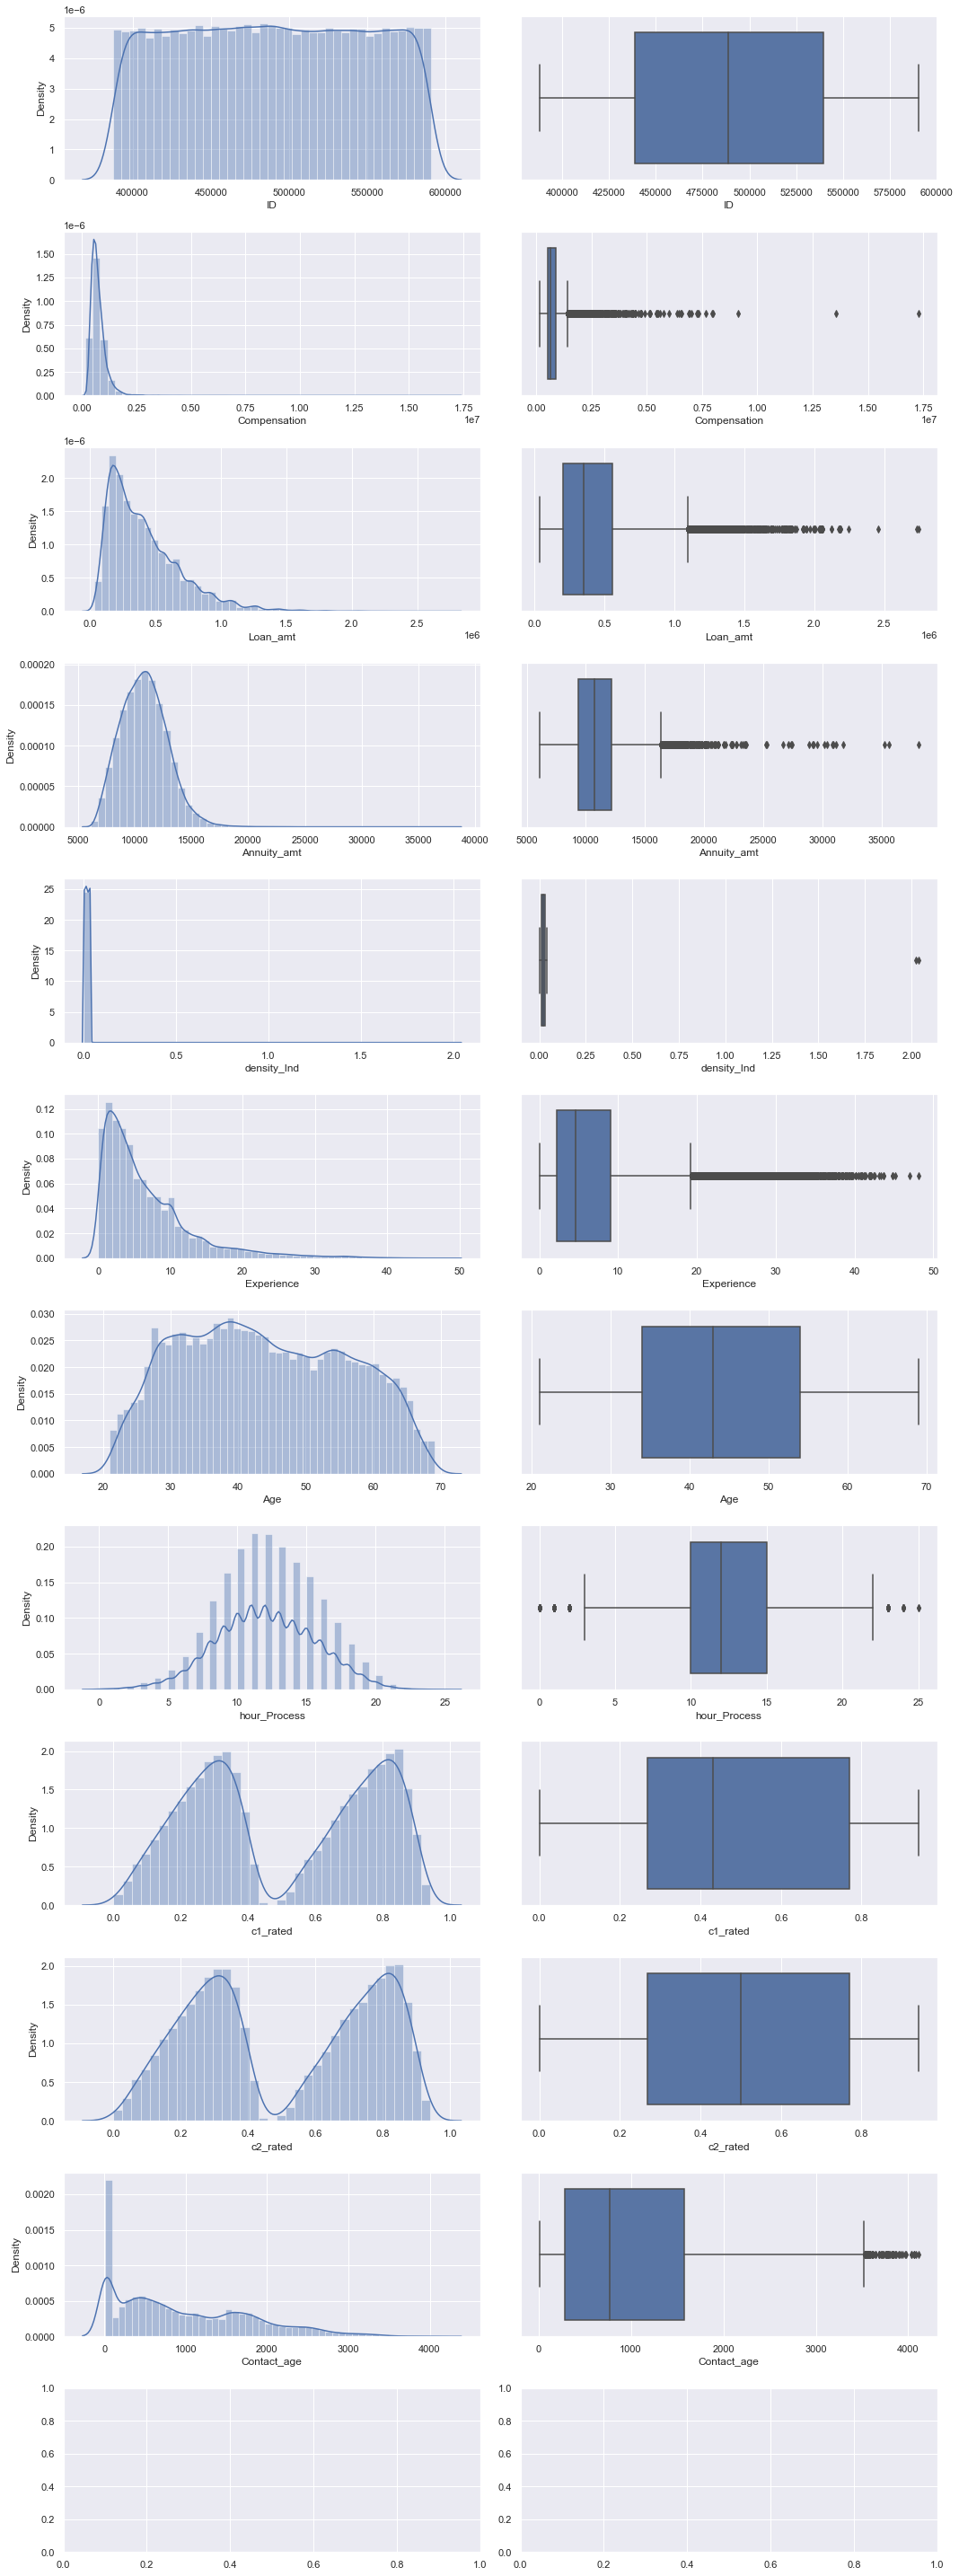

In [38]:
import warnings
warnings.filterwarnings("ignore")
import os
fig, axes = plt.subplots(nrows=12, ncols=2)
fig.set_size_inches(15,40)
j=0
for i in df_test.select_dtypes(include= 'number', exclude= 'object').columns:
    a = sns.distplot(df_test[i],ax=axes[j][0])
    a = sns.boxplot(df_test[i], orient = "h" , ax=axes[j][1])
    j=j+1
       
fig.tight_layout(w_pad=1.0)
plt.show()

In [39]:
#visualise the percentage of outliers in the dataset
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).sum()/df_train.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Addr_permanent,0.00
Age,0.00
Annuity_amt,0.77
Company_Rating,0.00
Compensation,4.01
Contact_age,0.12
Credit_Inq,0.00
Credit_Lnks,0.00
Day_Process,0.00
Default,0.00


In [40]:
#visualise the percentage of outliers in the dataset
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df_test < (Q1 - 1.5 * IQR)) | (df_test > (Q3 + 1.5 * IQR))).sum()/df_test.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Addr_permanent,0.00
Age,0.00
Annuity_amt,0.81
Company_Rating,0.00
Compensation,3.91
Contact_age,0.14
Credit_Inq,0.00
Credit_Lnks,0.00
Day_Process,0.00
Default_hist,0.00


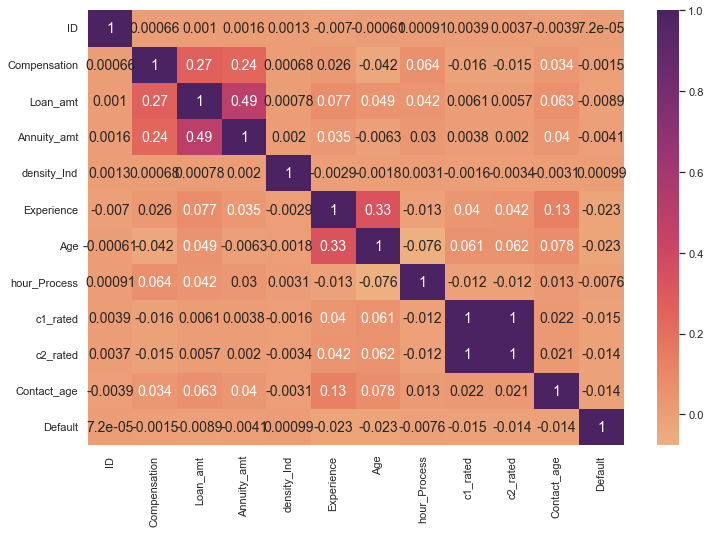

In [41]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df_num.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

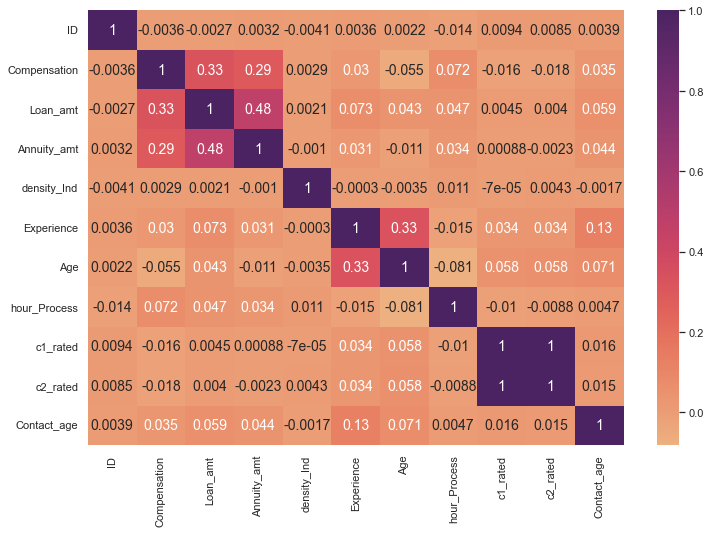

In [42]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df_num1.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

## Imputing categorical values

In [43]:
df_train.loc[df_train['Vehicle_Status'].isnull() == True,'Vehicle_Status'] = df_train['Vehicle_Status'].mode()[0]
df_test.loc[df_test['Vehicle_Status'].isnull() == True,'Vehicle_Status'] = df_train['Vehicle_Status'].mode()[0]

df_train.loc[df_train['Job_Type'].isnull() == True,'Job_Type'] = df_train['Job_Type'].mode()[0]
df_test.loc[df_test['Job_Type'].isnull() == True,'Job_Type'] = df_train['Job_Type'].mode()[0]

df_train.loc[df_train['Prop_List'].isnull() == True,'Prop_List'] = df_train['Prop_List'].mode()[0]
df_test.loc[df_test['Prop_List'].isnull() == True,'Prop_List'] = df_train['Prop_List'].mode()[0]

df_train.loc[df_train['Credit_Inq'].isnull() == True,'Credit_Inq'] = df_train['Credit_Inq'].mode()[0]
df_test.loc[df_test['Credit_Inq'].isnull() == True,'Credit_Inq'] = df_train['Credit_Inq'].mode()[0]

df_train.loc[df_train['Income_Alt'].isnull() == True,'Income_Alt'] = df_train['Income_Alt'].mode()[0]
df_test.loc[df_test['Income_Alt'].isnull() == True,'Income_Alt'] = df_train['Income_Alt'].mode()[0]

df_train.loc[df_train['Home_Appliances'].isnull() == True,'Home_Appliances'] = df_train['Home_Appliances'].mode()[0]
df_test.loc[df_test['Home_Appliances'].isnull() == True,'Home_Appliances'] = df_train['Home_Appliances'].mode()[0]

df_train.loc[df_train['Company_Rating'].isnull() == True,'Company_Rating'] = df_train['Company_Rating'].mode()[0]
df_test.loc[df_test['Company_Rating'].isnull() == True,'Company_Rating'] = df_train['Company_Rating'].mode()[0]

count    127829.000000
mean      10845.286442
std        2061.529355
min        5852.100000
25%        9348.370000
50%       10773.820000
75%       12165.390000
max       41301.000000
Name: Annuity_amt, dtype: float64


<AxesSubplot:xlabel='Annuity_amt'>

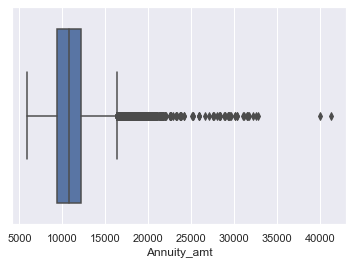

In [44]:
# For yearly income Train data
print(df_num['Annuity_amt'].describe())
sns.boxplot(df_num['Annuity_amt'])

In [45]:
## Outlier treatment 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
# For Train data
for column in df_train.select_dtypes(include= 'number', exclude= 'object').columns:
    lr,ur=remove_outlier(df_train[column])
    df_train[column]=np.where(df_train[column]>ur,ur,df_train[column])
    df_train[column]=np.where(df_train[column]<lr,lr,df_train[column])

In [47]:
# For Train data
for column in df_test.select_dtypes(include= 'number', exclude= 'object').columns:
    lr,ur=remove_outlier(df_test[column])
    df_test[column]=np.where(df_test[column]>ur,ur,df_test[column])
    df_test[column]=np.where(df_test[column]<lr,lr,df_test[column])

In [48]:
df_train['Compensation']=df_train['Compensation'].fillna(df_train['Compensation'].median())
df_test['Compensation']=df_test['Compensation'].fillna(df_test['Compensation'].median())

df_train['Annuity_amt']=df_train['Annuity_amt'].fillna(df_train['Annuity_amt'].median())
df_test['Annuity_amt']=df_test['Annuity_amt'].fillna(df_test['Annuity_amt'].median())

df_train['density_Ind']=df_train['density_Ind'].fillna(df_train['density_Ind'].median())
df_test['density_Ind']=df_test['density_Ind'].fillna(df_test['density_Ind'].median())

df_train['Experience']=df_train['Experience'].fillna(df_train['Experience'].median())
df_test['Experience']=df_test['Experience'].fillna(df_test['Experience'].median())

df_train['c1_rated']=df_train['c1_rated'].fillna(df_train['c1_rated'].median())
df_test['c1_rated']=df_test['c1_rated'].fillna(df_test['c1_rated'].median())

df_train['c2_rated']=df_train['c2_rated'].fillna(df_train['c2_rated'].median())
df_test['c2_rated']=df_test['c2_rated'].fillna(df_test['c2_rated'].median())

df_train['Contact_age']=df_train['Contact_age'].fillna(df_train['Contact_age'].median())
df_test['Contact_age']=df_test['Contact_age'].fillna(df_test['Contact_age'].median())

In [49]:
 df_train.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [50]:
 df_test.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

 categories present in Vehicle_Status-


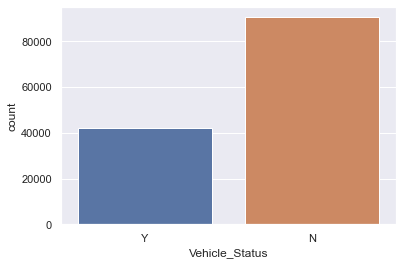

 categories present in Job_Type-


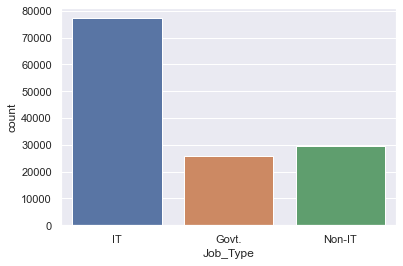

 categories present in Default_hist-


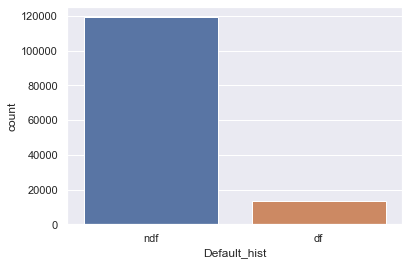

 categories present in Prop_List-


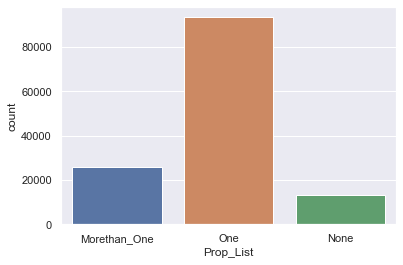

 categories present in Home_Appliances-


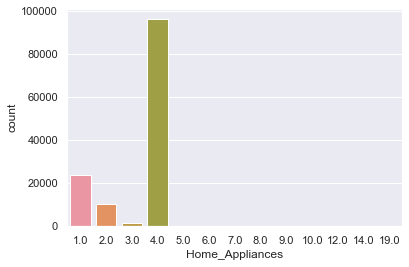

 categories present in Region_Type-


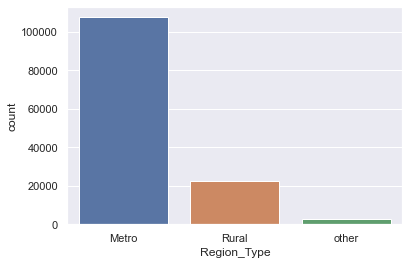

 categories present in Credit_Inq-


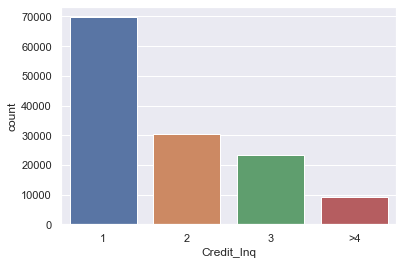

 categories present in Education_det-


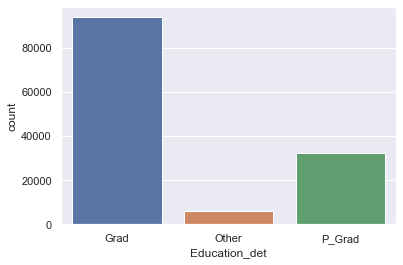

 categories present in Marital_Stat-


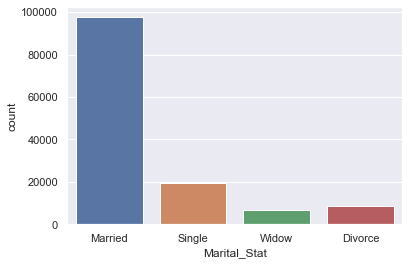

 categories present in Gen-


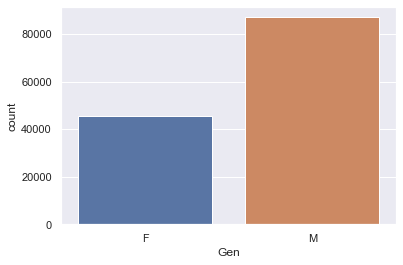

 categories present in Credit_Lnks-


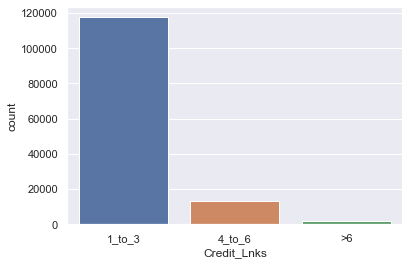

 categories present in Income_Alt-


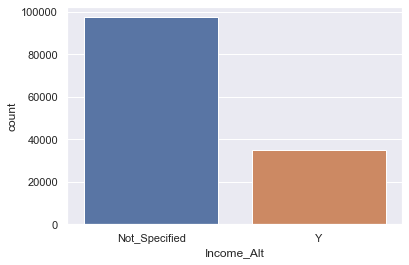

 categories present in Day_Process-


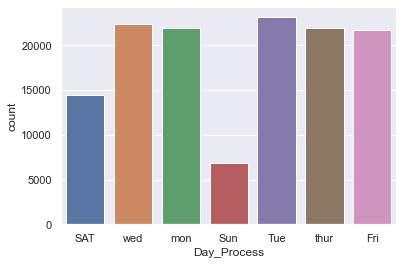

 categories present in Ph.No-


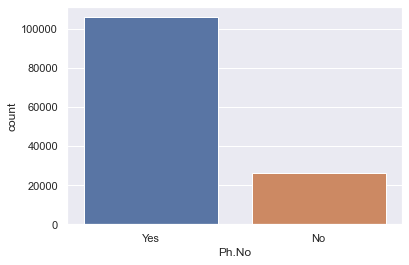

 categories present in Type_Loan-


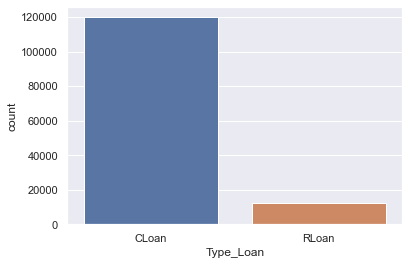

 categories present in Dependents-


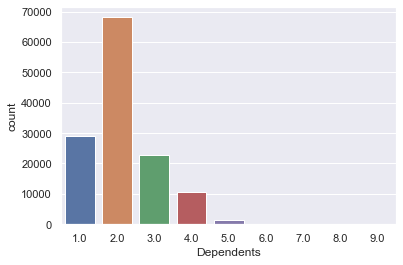

 categories present in Company_Rating-


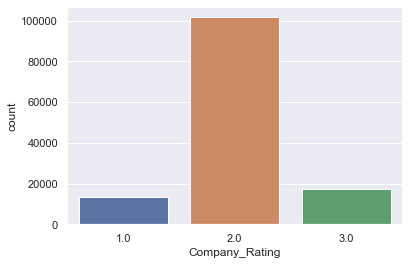

 categories present in Region-


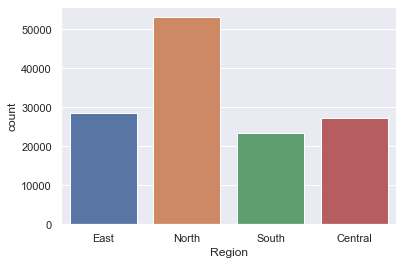

 categories present in Addr_permanent-


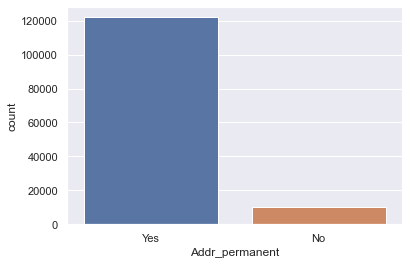

 categories present in Permanent_Addr_tag-


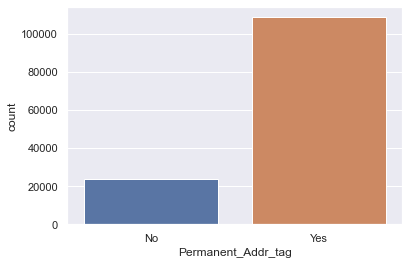

 categories present in Product_bought-


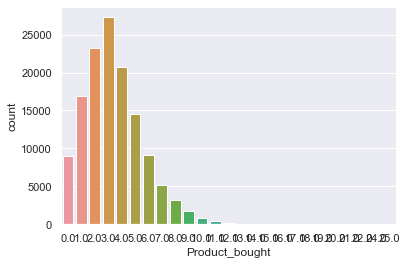

In [51]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':  
        print(' categories present in {}-'.format(i))
        sns.countplot(df_train[i])
        plt.show()   

In [52]:
# Checking data balance/proportion
Default = df_train.Default.value_counts().to_frame().rename(columns={"Default":"absolute"})
Default["percent"] = (Default.apply(lambda x: x/x.sum()*100).round(2))
display(Default)

,absolute,percent
0.0,97436,73.57
1.0,35004,26.43


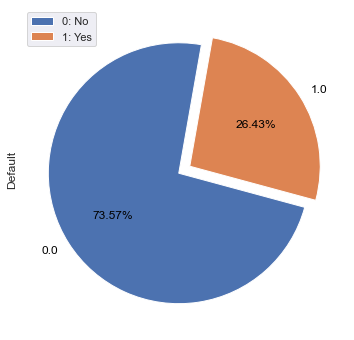

In [53]:
# pie chart
df_train.Default.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: No","1: Yes"]);

In [54]:
df_train.drop('ID',axis = 1,inplace = True)
test_file_ids = df_test['ID'] ## necessary step
df_test.drop('ID',axis = 1,inplace = True)

In [55]:
from sklearn import preprocessing

In [56]:
label_encoder = preprocessing.LabelEncoder()

In [57]:
df_train.head(1)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,4.0,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0


In [58]:
df_train['Vehicle_Status']= label_encoder.fit_transform(df_train['Vehicle_Status'])
df_train['Product_bought']= label_encoder.fit_transform(df_train['Product_bought'])
df_train['Job_Type']= label_encoder.fit_transform(df_train['Job_Type'])
df_train['Credit_Lnks']= label_encoder.fit_transform(df_train['Credit_Lnks'])
df_train['Default_hist']= label_encoder.fit_transform(df_train['Default_hist'])
df_train['Prop_List']= label_encoder.fit_transform(df_train['Prop_List'])
df_train['Region_Type']= label_encoder.fit_transform(df_train['Region_Type'])
df_train['Marital_Stat']= label_encoder.fit_transform(df_train['Marital_Stat'])
df_train['Home_Appliances']= label_encoder.fit_transform(df_train['Home_Appliances'])
df_train['Credit_Inq']= label_encoder.fit_transform(df_train['Credit_Inq'])
df_train['Education_det']= label_encoder.fit_transform(df_train['Education_det'])
df_train['Gen']= label_encoder.fit_transform(df_train['Gen'])
df_train['Income_Alt']= label_encoder.fit_transform(df_train['Income_Alt'])
df_train['Day_Process']= label_encoder.fit_transform(df_train['Day_Process'])
df_train['Ph.No']= label_encoder.fit_transform(df_train['Ph.No'])
df_train['Type_Loan']= label_encoder.fit_transform(df_train['Type_Loan'])
df_train['Dependents']= label_encoder.fit_transform(df_train['Dependents'])
df_train['Company_Rating']= label_encoder.fit_transform(df_train['Company_Rating'])
df_train['Region']= label_encoder.fit_transform(df_train['Region'])
df_train['Addr_permanent']= label_encoder.fit_transform(df_train['Addr_permanent'])
df_train['Permanent_Addr_tag']= label_encoder.fit_transform(df_train['Permanent_Addr_tag'])

In [59]:
df_test['Vehicle_Status']= label_encoder.fit_transform(df_test['Vehicle_Status'])
df_test['Product_bought']= label_encoder.fit_transform(df_test['Product_bought'])
df_test['Job_Type']= label_encoder.fit_transform(df_test['Job_Type'])
df_test['Credit_Lnks']= label_encoder.fit_transform(df_test['Credit_Lnks'])
df_test['Default_hist']= label_encoder.fit_transform(df_test['Default_hist'])
df_test['Prop_List']= label_encoder.fit_transform(df_test['Prop_List'])
df_test['Region_Type']= label_encoder.fit_transform(df_test['Region_Type'])
df_test['Marital_Stat']= label_encoder.fit_transform(df_test['Marital_Stat'])
df_test['Home_Appliances']= label_encoder.fit_transform(df_test['Home_Appliances'])
df_test['Credit_Inq']= label_encoder.fit_transform(df_test['Credit_Inq'])
df_test['Education_det']= label_encoder.fit_transform(df_test['Education_det'])
df_test['Gen']= label_encoder.fit_transform(df_test['Gen'])
df_test['Income_Alt']= label_encoder.fit_transform(df_test['Income_Alt'])
df_test['Day_Process']= label_encoder.fit_transform(df_test['Day_Process'])
df_test['Ph.No']= label_encoder.fit_transform(df_test['Ph.No'])
df_test['Type_Loan']= label_encoder.fit_transform(df_test['Type_Loan'])
df_test['Dependents']= label_encoder.fit_transform(df_test['Dependents'])
df_test['Company_Rating']= label_encoder.fit_transform(df_test['Company_Rating'])
df_test['Region']= label_encoder.fit_transform(df_test['Region'])
df_test['Addr_permanent']= label_encoder.fit_transform(df_test['Addr_permanent'])
df_test['Permanent_Addr_tag']= label_encoder.fit_transform(df_test['Permanent_Addr_tag'])

In [60]:
df_train.head(1)

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,801850.0,1,658040.0,13816.52,0.0304,1,1,0,3,0,0,0,1,0,0,0.9,0,1,1,0,2,1,1,46.0,10.0,1,0,0.077,0.077,18.0,2,1.0


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        132440 non-null  float64
 1   Vehicle_Status      132440 non-null  int32  
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         132440 non-null  float64
 4   density_Ind         132440 non-null  float64
 5   Job_Type            132440 non-null  int32  
 6   Default_hist        132440 non-null  int32  
 7   Prop_List           132440 non-null  int32  
 8   Home_Appliances     132440 non-null  int32  
 9   Region_Type         132440 non-null  int32  
 10  Credit_Inq          132440 non-null  int32  
 11  Education_det       132440 non-null  int32  
 12  Marital_Stat        132440 non-null  int32  
 13  Gen                 132440 non-null  int32  
 14  Credit_Lnks         132440 non-null  int32  
 15  Experience          132440 non-nul

In [62]:
X = df_train.drop("Default", axis=1)

y = df_train.pop("Default")

X.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,801850.0,1,658040.0,13816.52,0.0304,1,1,0,3,0,0,0,1,0,0,0.9,0,1,1,0,2,1,1,46.0,10.0,1,0,0.077,0.077,18.0,2
1,884222.0,0,198075.0,11173.06,0.0194,1,1,0,0,0,1,0,1,1,0,3.0,0,6,1,0,2,0,2,46.0,12.0,1,1,0.184,0.184,306.0,4
2,284120.0,0,101056.0,8390.40,0.0118,0,1,2,3,0,2,1,1,1,0,4.6,0,4,1,0,1,2,2,57.0,5.0,1,1,0.538,0.538,281.0,4
3,341874.0,0,179008.0,7184.13,0.0373,2,0,1,1,0,0,0,1,1,0,4.7,0,6,1,1,3,1,3,39.0,12.0,1,1,0.500,0.561,20.0,4
4,1259895.0,1,573715.0,13212.77,0.0138,2,1,0,0,1,1,0,1,0,1,6.9,1,2,1,0,2,0,2,32.0,16.0,1,1,0.500,0.200,2339.0,6


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.20, random_state=1)

#Check the dimensions of the training and test data
display(X_train.shape)
display(X_val.shape)
display(y_train.shape)
display(y_val.shape)

(105952, 31)

(26488, 31)

(105952,)

(26488,)

In [64]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler

# define min max scaler

#copy of dataset
X_train_sc = X_train.copy()
X_val_sc = X_val.copy()

#numeric column which need to be Normalized
num_cols=['Compensation', 'Loan_amt', 'Annuity_amt','Experience', 'Age', 'hour_Process','Contact_age']
# transform data

for i in num_cols:
    
    #fit on training data column
    scale = StandardScaler().fit(X_train_sc[[i]])
    
    X_train_sc[i]= scale.fit_transform(X_train_sc[[i]])
    X_val_sc[i] = scale.transform(X_val[[i]])




In [65]:
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Default
0,540071,801850.0,658040.0,13816.52,0.0304,0.9,46.0,10.0,0.077,0.077,18.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,3.0,46.0,12.0,0.184,0.184,306.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,NaN,57.0,5.0,0.538,0.538,281.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,4.7,39.0,12.0,NaN,0.561,20.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,6.9,32.0,16.0,NaN,0.200,2339.0,0.0


In [66]:
# rfc.fit(X_train,y_train)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,random_state=0)
rf_model.fit(X_train,y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)

In [68]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_val,y_pred_val)
print("Train Accuracy:",dt_acc_train)
print("Validation Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_val,y_pred_val)
print("Train ROC AUC score:",dt_roc_train)
print("Validation ROC AUC score:",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_val,y_pred_val)
print("Train Classification Report:\n",dt_clr_train)
print("Validation Classification Report:\n",dt_clr_val)

Train Accuracy: 0.7367109634551495
Validation Accuracy: 0.7351630927212323

Train ROC AUC score: 0.5018025125079659
Validation ROC AUC score: 0.5000743289060392

Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     77957
         1.0       0.97      0.00      0.01     27995

    accuracy                           0.74    105952
   macro avg       0.85      0.50      0.43    105952
weighted avg       0.80      0.74      0.63    105952

Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     19479
         1.0       0.31      0.00      0.00      7009

    accuracy                           0.74     26488
   macro avg       0.52      0.50      0.42     26488
weighted avg       0.62      0.74      0.62     26488



In [69]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [70]:
print(' Train F1 score:',f1_score(y_train, y_pred_train))
print(' val F1 score:',f1_score(y_val, y_pred_val))

 Train F1 score: 0.007259786476868327
 val F1 score: 0.0014234875444839856


In [71]:
from sklearn.linear_model import LogisticRegression

#Fit Logistic Reggression model
lr_model= LogisticRegression (n_jobs=-1,random_state=21,class_weight="balanced")
lr_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=21)

In [72]:
# Predicting on the Training Data
lrmodel_pred_train = lr_model.predict(X_train)
# Predicting on the Test Data
lrmodel_pred_val = lr_model.predict(X_val)

In [73]:
print(' Train F1 score:',f1_score(y_train, lrmodel_pred_train))
print(' Test F1 score:',f1_score(y_val, lrmodel_pred_val))

 Train F1 score: 0.36116075627880734
 Test F1 score: 0.3639861124143755


In [74]:
from sklearn.linear_model import LogisticRegression

#Fit Logistic Reggression model
lr_model1= LogisticRegression (n_jobs=-1,random_state=21,class_weight="balanced")
lr_model1.fit(X_train_sc,y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=21)

In [75]:
# Predicting on the Training Data
lrmodel_pred_train1 = lr_model1.predict(X_train_sc)
# Predicting on the Test Data
lrmodel_pred_val1 = lr_model1.predict(X_val)

In [76]:
print(' Train F1 score:',f1_score(y_train, lrmodel_pred_train1))
print(' val F1 score:',f1_score(y_val, lrmodel_pred_val1))

 Train F1 score: 0.36509619754582645
 val F1 score: 0.4164244186046512


## Model 2 - Best Model

### Logistic Regression

In [77]:
display(df_test.shape)

(56760, 31)

In [78]:
X_val.shape

(26488, 31)

In [79]:
df_test.columns

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

In [83]:
final_predictions = lr_model1.predict(df_test)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Default"},inplace=True)
submission.to_csv('submission1.csv',index = False)

- ### Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

- ### The very important factors in my point of view which will help a company to accept or decline a loan are.
- #### when the personal is choose a car type, its important to check his source of income, 
- #### does he have any other existing loans or not, 
- #### how many dependents are there with the person, his economic stability.
- #### How is he maintaining his credit scores.
- #### Missing informations on paper.